In [2]:
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sb  #
import matplotlib.pyplot as plt

## **2. Implement thuật toán PCA bằng numpy**

In [5]:
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components

    def fit_transform(self, X):
        X = X - np.mean(X, axis = 0)
        cov_mat = np.cov(X.T)
        
        self.eig_vals , self.eig_vecs = np.linalg.eig(cov_mat)
        
        sorted_idx = np.argsort(self.eig_vals)[::-1]
        sorted_eigvals = self.eig_vals[sorted_idx]
        sorted_eigvecs = self.eig_vecs[:, sorted_idx]
        
        eigvec_subset = sorted_eigvecs[:, 0:self.n_components]
        
        X_reduced = np.dot(eigvec_subset.T, X.T).T
        
        return X_reduced

    def explained_variance(self):
        variance_explained = []
        for i in self.eig_vals:
            variance_explained.append((i/sum(self.eig_vals)))
        return variance_explained


## **3. Dùng thuật toán ở bài 2, giảm dữ liệu iris về 2 chiều**

a. Visualize dữ liệu giảm chiều với scatter plot và label của hoa

b. Vẽ explained variance graph với các chiều của dữ liệu

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

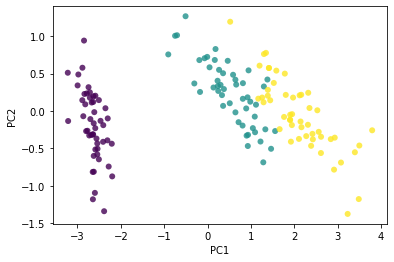

In [7]:
pca = PCA(2)
reduced = pca.fit_transform(X)
plt.scatter(reduced[:, 0], reduced[:, 1], c=y, edgecolor="none", alpha=0.8)

plt.xlabel('PC1')
plt.ylabel('PC2')   
plt.show()

Text(0, 0.5, 'cumulative explained variance')

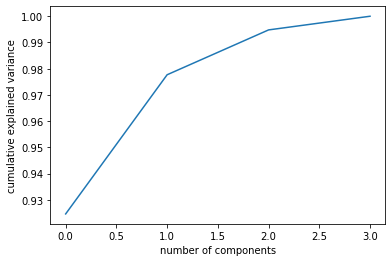

In [8]:
explained_var = pca.explained_variance()
plt.plot(np.cumsum(explained_var))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## **4. Thử dùng bài 3 với thuật toán PCA trong sklearn, so sánh kết quả**

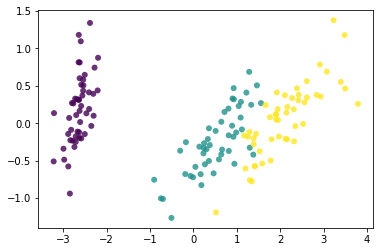

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X)

plt.scatter(components[:, 0], components[:, 1], c=y, edgecolor="none", alpha=0.8)
plt.show()

Text(0, 0.5, 'cumulative explained variance')

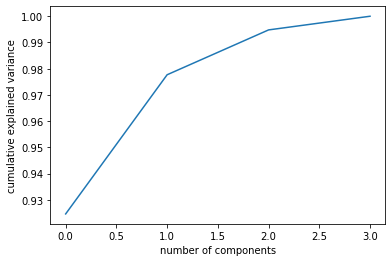

In [10]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [11]:
print(reduced[:5])
print(components[:5])

[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]]
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


So sánh thuật toán tự implement và thuật toán PCA trong sklearn cho thấy thấy dấu của PC2 bị ngược nhau. Tuy nhiên có thể nói kết quả 2 cách là giống nhau, và thấy được sự phân cụm giữa các class khác nhau.